In [1]:
import sys
sys.path.insert(0, '/nfs/datasets/codesum/rubenNN/')

In [2]:
import os
os.chdir('../')

In [3]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Usefull imports throughout the notebook
import config
import numpy as np

from myutils import *

# MNIST - Sentiment Learning Demo

In this demo, we see the 'Sentiment Learner' as a strictly defined rule: even vs odd numbers. We define zero (False) as even, and one (True) as odd.

## Create the Model

To create the model, we should define a mapping function which maps the ground truth labels corresponding the images (i.e. the indices the images try to represent in this case) to a binary representation. For this demo, I've chosen to train the model to learn to recognize even and odd numbers, based on a (live) manually curated training-set.

In [5]:
def mapping(x):
    return x % 2

In [6]:
%%capture

from sentiment_learner import SentimentLearner

model = SentimentLearner(
    name='mnist',
    data_path='data/mnist/',
    mapping=mapping
)

## Evaluate and Train Loop


Evaluate the model to get the 'most uncertain sample', which will then be used to manually evaluate and next is added to the training set. The idea is to learn a decent data-distribution only after a relatively few manually curated samples.

Note: Newly added training data keeps also occurring in the evaluation data, there is no specific reason for this.

70000/70000 [==============================] - 10s 145us/step


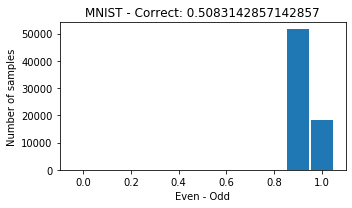

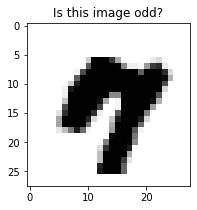

Is image '17961' odd? [Yes/No]y
Epoch 1/1
1/1 [==============================] - 1s 1s/step - loss: 0.2589 - acc: 1.0000
Saving the model... done, 2.89 seconds.
70000/70000 [==============================] - 7s 98us/step


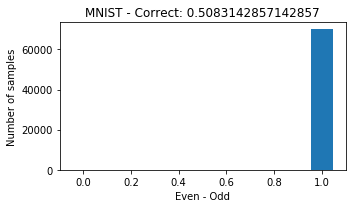

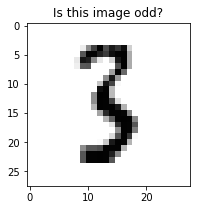

Is image '6500' odd? [Yes/No]y
Epoch 1/1
2/2 [==============================] - 0s 41ms/step - loss: 0.0110 - acc: 1.0000
Saving the model... done, 2.9 seconds.
70000/70000 [==============================] - 7s 101us/step


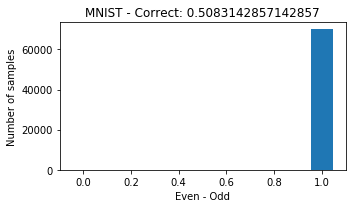

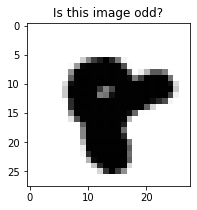

Is image '10281' odd? [Yes/No]n
Epoch 1/1
3/3 [==============================] - 0s 23ms/step - loss: 1.7716 - acc: 0.6667
Saving the model... done, 2.73 seconds.
70000/70000 [==============================] - 7s 99us/step


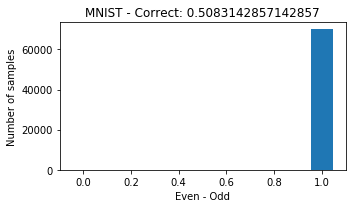

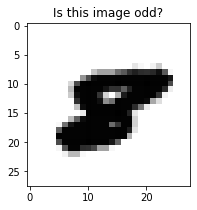

Is image '31014' odd? [Yes/No]n
Epoch 1/1
4/4 [==============================] - 0s 24ms/step - loss: 2.1081 - acc: 0.5000
Saving the model... done, 2.86 seconds.
70000/70000 [==============================] - 7s 99us/step


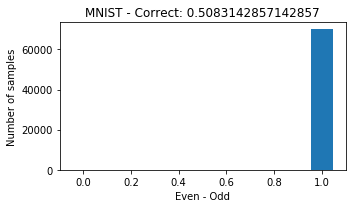

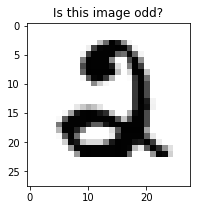

Is image '18370' odd? [Yes/No]n
Epoch 1/1
5/5 [==============================] - 0s 14ms/step - loss: 2.2348 - acc: 0.4000
Saving the model... done, 2.81 seconds.
70000/70000 [==============================] - 6s 90us/step


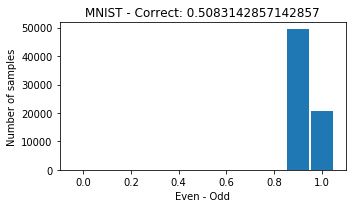

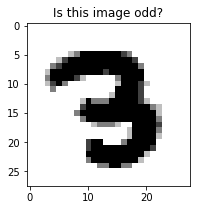

Is image '25311' odd? [Yes/No]y
Epoch 1/1
6/6 [==============================] - 0s 79ms/step - loss: 1.4292 - acc: 0.5000
Saving the model... done, 2.71 seconds.
70000/70000 [==============================] - 7s 107us/step


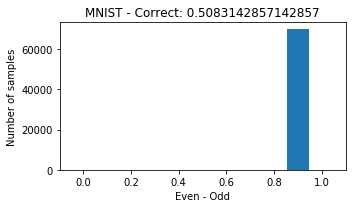

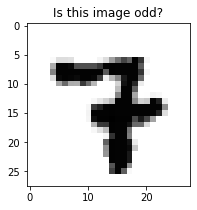

Is image '63352' odd? [Yes/No]y
Epoch 1/1
7/7 [==============================] - 0s 71ms/step - loss: 0.9817 - acc: 0.5714
Saving the model... done, 2.74 seconds.
70000/70000 [==============================] - 8s 107us/step


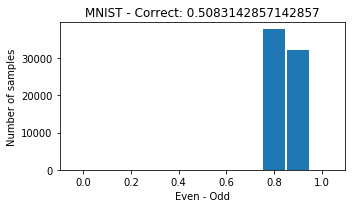

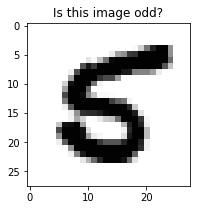

Is image '68049' odd? [Yes/No]y
Epoch 1/1
8/8 [==============================] - 0s 11ms/step - loss: 0.7795 - acc: 0.6250
Saving the model... done, 2.69 seconds.
70000/70000 [==============================] - 7s 105us/step


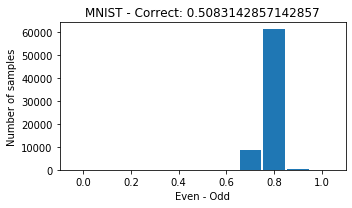

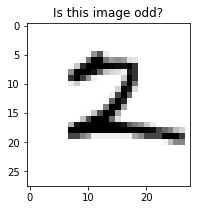

Is image '45283' odd? [Yes/No]n
Epoch 1/1
9/9 [==============================] - 0s 43ms/step - loss: 0.6949 - acc: 0.5556
Saving the model... done, 2.61 seconds.
70000/70000 [==============================] - 7s 97us/step


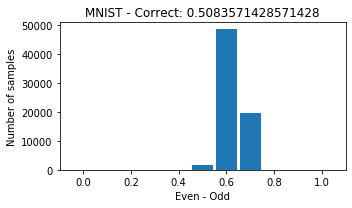

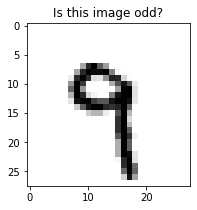

Is image '2722' odd? [Yes/No]y
Epoch 1/1
10/10 [==============================] - 0s 9ms/step - loss: 0.6345 - acc: 0.5000
Saving the model... done, 2.87 seconds.
70000/70000 [==============================] - 7s 104us/step


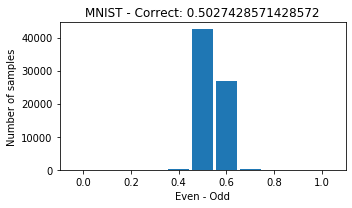

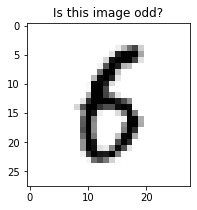

Is image '4560' odd? [Yes/No]n
Epoch 1/1
11/11 [==============================] - 0s 38ms/step - loss: 0.6398 - acc: 0.6364
Saving the model... done, 2.81 seconds.
70000/70000 [==============================] - 7s 106us/step


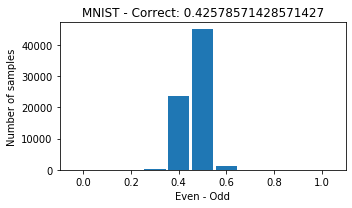

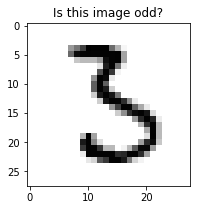

Is image '53838' odd? [Yes/No]y
Epoch 1/1
12/12 [==============================] - 0s 33ms/step - loss: 0.5989 - acc: 0.8333
Saving the model... done, 2.92 seconds.
70000/70000 [==============================] - 8s 109us/step


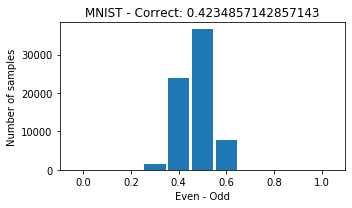

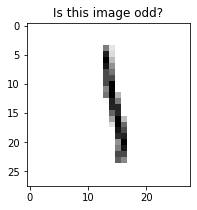

Is image '10248' odd? [Yes/No]y
Epoch 1/1
13/13 [==============================] - 1s 39ms/step - loss: 0.5684 - acc: 0.7692
Saving the model... done, 2.82 seconds.
70000/70000 [==============================] - 7s 106us/step


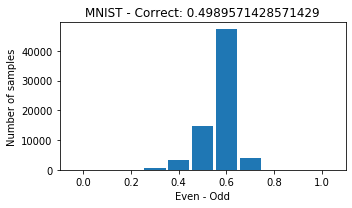

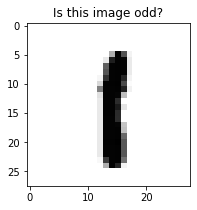

In [ ]:
while True:
    model.eval_and_train()

In [ ]:
model.train_labels.shape

In [ ]:
model.train_images.shape

In [ ]:
model.train_images[1].shape